**<h1> Titanic - Machine Learning from Disaster</h1>**

**Nikhil Sharma**

### Table of Contents:

* [1. Introduction](#introduction)
* [2. Data Understanding](#data_understanding)
* [3. Data Preparation](#data_preparation)
* [4. Data Pre-Processing](#data_processing)
* [5. Model Selection](#model_selection)
* [6. Model Testing](#model_testing)
* [7. Conclusion](#conclusion)

# 1. Introduction:<a class="anchor" id="introduction"></a>
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “ unsinkable ” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on-board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “ what sorts of people were more likely to survive? ” using passenger data (i.e. name, age, gender, socio-economic class, etc).

# 2. Data Understanding<a class="anchor" id="data_understanding"></a>
On April 15, 1912, the  Titanic collided with an iceberg and sank. When the Titanic sank, it killed 1502 out of 2224 passengers and crew. 

We'll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

`Train.csv` will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”. The training set should be used to build our machine learning models. For the training set, we have the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s our job to predict these outcomes. The test set should be used to see how well your model performs on unseen data. Our job is to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We will then determine if there is a relationship between survival and the different features. The following table summarizes the data:

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>


# 3. Data Preparation<a class="anchor" id="data_preparation"></a>
* We will import the required libraries.
* We will Load the both training and testing dataset.
* We will check correlation of unprocessed data.

**Import required libraries.**

In [1]:
#make sure you have installed the libraries before importing them.

#Basic Analytical libraries
import numpy as np
import pandas as pd
import scipy.stats as st 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#imblearn libraries for balancing our data
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Different classification model's libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

#Different Clustering Algorihtms
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift, estimate_bandwidth

#Libraries for data preprocessing, Imputing, scaling, and splitting the data.
from sklearn.preprocessing import OneHotEncoder,StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, learning_curve


#Libraries for different metrics
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

#Libraries for Hyperparameter tuning, feature selection, and importances. 
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV, cross_val_score
from collections import Counter
from sklearn.feature_selection import SequentialFeatureSelector

from mpl_toolkits import mplot3d
import seaborn as sns
import math


##Supress Warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

**Load the Data**

* **X** - Training Data
* **Y** - Testing Data

In [2]:
X = pd.read_csv('data/train.csv')
Y = pd.read_csv('data/test.csv')

In [3]:
X.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
Y.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


We will separate `PassengerId` from our testing data `Y` and store it into `y_pass_id` variable for submission.

In [5]:
# Separate test_df PassengerId
y_pass_id = Y.pop('PassengerId')

**Unprocessed Data Correlation**

In [6]:
X.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

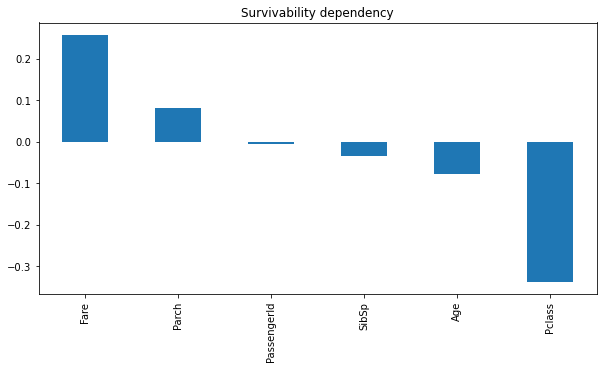

In [7]:
# Concatenate into a full dataset
#X = pd.concat([X, y], axis=1)

correlation = X.corr()['Survived'].sort_values(ascending=False)

# Correlation graph
correlation[1:].plot(kind='bar', figsize=(10,5), title='Survivability dependency')
plt.show()

Few Findings:
* `Fare` and `Pclass` have the highest correlation to `Survived`, it seams higher class (also higher Fare) had priority to embark the lifeboats.
* `Pclass` has negative correlation because `Pclass` is numbered 1 = High, 2 = Medium, 3 = Low, but results to an inverse survivability (class 3 = lower chance to survive, class 1 = higher chance).

# 4. Data Pre-Processing<a class="anchor" id="data_processing"></a>

We will continue processing our `X` or Training data for Analysis

In [8]:
print('Shape of the Dataframe -  X: '.center(60,'-'))
print("Number of rows in the data:", X.shape[0])
print("Number of columns in the data:", X.shape[1])

---------------Shape of the Dataframe -  X: ----------------
Number of rows in the data: 891
Number of columns in the data: 12


In [9]:
X.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We will check for null values.

In [10]:
X.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Few Findings:

* Some features need imputation.
* `Cabin` feature has a lot of missing values, we will use the available values to create a new feature and we will drop the `Cabin` feature.
* We will create the feature `Deck_level`, using the correlation between `Pclass` and info deducted from `Cabin` feature. We suppose that the `Deck_level` could take a role in survivability of the people as the lifeboats were on the top of the deck level.
* From `Name` feature we will split the `LastName` and `Title` and create their respective features and we will use it during creation of `Deck_level`.
* `Age` feature has null values, so we will choose a median value while imputing it by new feature we created `Title`.


**Data Processing**
* We will store the `X.shape[0]` or the the number of our rows into `X_max_index` for splitting the data.
* We will also separate our features and target into `X_train` and `y`.
* We will concatenate both training and testing data into one `X_train` dataset.
* In the end, We will also check for Feature instances.

In [12]:
# Keep max index that will be used to back split training and test data
X_max_index = X.shape[0]
print('X-Max_Index = ', X_max_index)

# Separate features and target
y = X.Survived

X_train = X.drop(['Survived', 'PassengerId'], axis=1)
X_train = pd.concat([X_train, Y], axis=0).reset_index(drop=True)

X_train.info()

X-Max_Index =  891
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 102.4+ KB


Let's check for feature instances

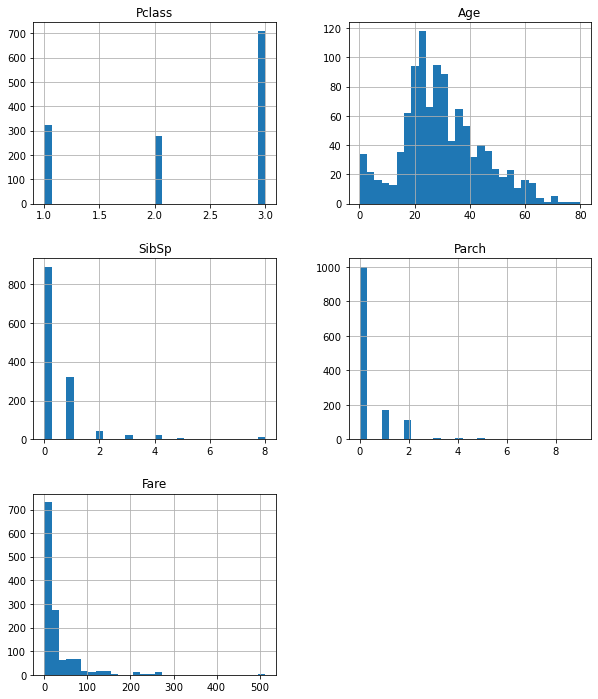

In [13]:
#Feature Instances
X_train.hist(bins=30, figsize=(10,12))
plt.show()

Few Findings:
* Each attributes have different scales
* Some features are skewed to the right, we should check for outliers and normalize data.
* `Fare` has  values in `0` that's cannot be right.

In [14]:
# Zero values in Fare we will consider it as an error or an outlier and we will delete for further imputation
X_train.loc[X_train.Fare.eq(0), 'Fare'] = np.nan
X_train.shape

(1309, 10)

Now, Let's Split `LastName` and `Title` from `Name` into their respective feature.

In [15]:
#Exctracting the Last Name from name feature
X_train['LastName'] = X_train.Name.str.split(', ').str[0]

# Extracting the Title from Name feature
X_train['Title'] = X_train.Name.str.split(', ').str[1]
X_train['Title'] = X_train.Title.str.split('.').str[0]

#Take a peek at our Dataframe
X_train.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss


We will analyze the Title for further exploration.

In [16]:
#Let's Have a count of Titles
X_train.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

Few Findings:
* There are some title with the same meaning that should be joined together and also many unique titles that we will group under the title `Noble`.

We will analyze the `Title` = `Mr` & `Master` with respective to their `Age`.

In [17]:
X_train[X_train.Title.eq('Mr')].Age.describe()

count    581.000000
mean      32.252151
std       12.422089
min       11.000000
25%       23.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
X_train[X_train.Title.eq('Master')].Age.describe()

count    53.000000
mean      5.482642
std       4.161554
min       0.330000
25%       2.000000
50%       4.000000
75%       9.000000
max      14.500000
Name: Age, dtype: float64

Few Findings:
* Title `Mr` was used from 11 years old and `Master` to maximum 15 years old. `Master` is an antiquated title for an underage male. We will join them together and then split again at age 15 to have a clean delimiter.

In [19]:
# Grouping the same type of titles.
# We also changed Miss to Mrs, but later we will convert back to Miss just for young females as for now Miss is not very usefull
# as it represents a young lady and also an unmarried adult one of any age.


females = ['Ms', 'Miss', 'Mlle', 'Mrs', 'Mme']
X_train.loc[X_train.Title.isin(females), 'Title'] = 'Mrs'

males = ['Master', 'Mr']
X_train.loc[(X_train.Title.isin(males)), 'Title'] = 'Mr'

# Change the titles for children to Master and Miss
X_train.loc[(X_train.Title.eq('Mr') & X_train.Age.lt(15)), 'Title'] = 'Master'
X_train.loc[(X_train.Title.eq('Mrs') & X_train.Age.lt(15)), 'Title'] = 'Miss'

# Create noble title
X_train.loc[(~X_train.Title.isin(females) & ~X_train.Title.isin(males)), 'Title'] = 'Noble'

In [20]:
X_train.tail(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Noble
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr
1308,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Peter,Mr


Few findings:
* We can see our new features `LastName` and `Title`.
* Let's process our `dataframe` a bit more. 
* Let's deal with some missing values, add some more required features, and then we will start dropping out the unnecessary features for our analysis and model.

 Let's Visualize how the `Gender` has the importance during survival.

In [ ]:
#First copy the data to keep the original datset untouched for further exploration.
X_copy = X_train.copy()

Create `Price` feature
* We should divide the Fare by number of passengers on the same ticket.
* We will also create two new feature `Ticket_series` and `Ticket_nr` from `Ticket` feature.
* We will Analyze Fare by ticket number to be sure that the Fare represents the full price of the ticket and not the price per person.

In [21]:
# Split Ticket by series and number
X_train['Ticket_series'] = [i[0] if len(i) > 1 else 0 for i in X_train.Ticket.str.split()]
X_train['Ticket_nr'] = [i[-1] for i in X_train.Ticket.str.split()]

# Check if Fare min and Fare max of the same ticket number are the same
df_fare = X_train[~X_train.Fare.isna()]
multi_tickets = df_fare.groupby(df_fare.Ticket_nr[df_fare.Ticket_nr.duplicated()])
(multi_tickets.Fare.min() != multi_tickets.Fare.max()).sum()

1

There is just `1` ticket where min and max don't correspond, we will ignore it as a mistake.

In [22]:
# Create a feature with the passengers number by ticket 
ticket_dict = X_train.groupby('Ticket_nr').LastName.count().to_dict()
X_train['Passengers_ticket'] = X_train.Ticket_nr.map(ticket_dict)

# Create Price feautre
X_train['Price'] = (X_train.Fare / X_train.Passengers_ticket).round()
X_train[['LastName','Price']].head()

,LastName,Price
0,Braund,7.0
1,Cumings,36.0
2,Heikkinen,8.0
3,Futrelle,27.0
4,Allen,8.0


Create `Deck` feature
* This feature will contain the deck letter after extracting it from the `cabin` feature

In [23]:
# Extract Deck letter from Cabin column
X_train['Deck'] = X_train.Cabin.str[0]

# Check how many missing values we have at this step
X_train.Deck.isna().sum()

1014

In [24]:
# Deck distribution by Pclass
X_train.groupby('Pclass').Deck.value_counts()

Pclass  Deck
1       C       94
        B       65
        D       40
        E       34
        A       22
        T        1
2       F       13
        D        6
        E        4
3       F        8
        G        5
        E        3
Name: Deck, dtype: int64

In [25]:
# Deck missing values by Pclass
X_train.loc[X_train.Deck.isna(), 'Pclass'].value_counts()

3    693
2    254
1     67
Name: Pclass, dtype: int64

Our next steps:
* We will impute the `Deck letter` based on `Ticket_nr`, if the same `Ticket_nr` already has an available value for `Deck` in other rows
* We will impute based on `Lastname` using the same method as in the first step, but to be sure that the passengers are not from different families with the same `Lastname` we will use some filters in the process.
* We will impute based on `Pclass`, as every `Pclass` was on separate Deck with some intersections between (from some google's information it confirms that class-deck distribution corresponds to our Deck distribution by `Pclass` analysis). To improve the accuracy we will check also the mean Price for each `Pclass-Deck` group to determine the Deck.

In [26]:
# Function for imputing Deck
def impute_deck(feature):
    for pclass in range(1, 4):
        # Create a mapping dictionary
        map_dic = (X_train[~X_train.Deck.isna() & X_train.Pclass.eq(pclass)]
                   .groupby(feature).Deck.unique()
                   .apply(list).to_dict())

        # Keep just the keys with a single deck to avoid 
        # the same key on different decks
        map_dic = {i:j[0] for i, j in map_dic.items() 
                   if len(j) == 1}

        # Imputing Deck from map_dic
        X_train.loc[X_train.Deck.isna() & X_train.Pclass.eq(pclass), 
               'Deck'] = X_train[feature].map(map_dic)

    # Check how many missing values we have at this step
    print(X_train.Deck.isna().sum())

In [27]:
impute_deck('Ticket_nr')

997


In [28]:
impute_deck('LastName')

989


We have recovered `25` values, which is not much, but they correspond to reality, we will impute the rest later based on `Pclass` and `Price` as mentioned earlier.

In [29]:
# List of titles
titles = list(X_train.Title.unique())

# Impute median Age by title
for title in titles:
    X_train.loc[(X_train.Age.isna() & X_train.Title.eq(title)), 'Age'] = X_train.loc[X_train.Title.eq(title), 'Age'].median()

In [30]:
X_train.Age.isnull().sum()

0

In [31]:
# Analyze Price by Deck and Pclass
X_train.groupby(['Pclass', 'Deck']).Price.describe()

count       mean        std   min    25%   50%   75%    max
Pclass Deck                                                             
1      A      21.0  32.857143   7.066015  26.0  28.00  30.0  36.0   50.0
       B      65.0  43.030769  25.892789   5.0  29.00  37.0  46.0  128.0
       C     105.0  35.809524   9.686524  25.0  28.00  34.0  42.0   68.0
       D      42.0  31.904762   9.714986  20.0  26.00  27.5  38.0   67.0
       E      35.0  26.342857   5.058149   9.0  26.50  27.0  28.0   38.0
       T       1.0  36.000000        NaN  36.0  36.00  36.0  36.0   36.0
2      D       6.0  13.666667   0.816497  13.0  13.00  13.5  14.0   15.0
       E       6.0   9.500000   3.619392   5.0   6.25  11.0  12.0   13.0
       F      16.0  10.937500   1.691892   9.0  10.00  10.0  13.0   13.0
3      E       3.0   6.666667   1.154701   6.0   6.00   6.0   7.0    8.0
       F      11.0   7.545455   0.522233   7.0   7.00   8.0   8.0    8.0
       G       5.0   5.600000   0.547723   5.0   5.00   6.0   6.0    6.0

We found that there is a very large standard deviation in `Pclass 1, Deck B` compared to others, we should analyze this!!!

In [32]:
# Cabin T was on the upper deck (with the help of Google), 
# so we will replace it with Deck A as it has only one value
X_train.loc[X_train.Deck.eq('T'), 'Deck'] = 'A'

In [33]:
# Let's Check the cheapest prices for Deck B
X_train[X_train.Deck.eq('B')].sort_values('Price').head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,Ticket_series,Ticket_nr,Passengers_ticket,Price,Deck
872,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0,B51 B53 B55,S,Carlsson,Mr,0,695,1,5.0,B
690,1,"Dick, Mr. Albert Adrian",male,31.0,1,0,17474,57.0,B20,S,Dick,Mr,0,17474,3,19.0,B
781,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,17474,57.0,B20,S,Dick,Mrs,0,17474,3,19.0,B
1199,1,"Hays, Mr. Charles Melville",male,55.0,1,1,12749,93.5,B69,S,Hays,Mr,0,12749,4,23.0,B
1281,1,"Payne, Mr. Vivian Ponsonby",male,23.0,0,0,12749,93.5,B24,S,Payne,Mr,0,12749,4,23.0,B


We found an `outlier` as `Mr Carlsson`, with `Ticket_nr no. - 695` has bought the ticket with very low amount of price compared to others. We know that this may be a mistake so will correct this !!!

In [34]:
# this value is an outlier that we will replace with the next min
X_train.loc[X_train.Ticket_nr.eq('695'), 'Price'] = 19

In [35]:
# Check the most expensive prices for Deck B
X_train[X_train.Deck.eq('B')].sort_values('Price', ascending=False).head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,Ticket_series,Ticket_nr,Passengers_ticket,Price,Deck
1234,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Cardeza,Mrs,PC,17755,4,128.0,B
258,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Ward,Mrs,PC,17755,4,128.0,B
737,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Lesurer,Mr,PC,17755,4,128.0,B
679,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Cardeza,Mr,PC,17755,4,128.0,B
118,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,Baxter,Mr,PC,17558,3,83.0,B


There are 2 outliers as in most expensive tickets as `Ticket_nr` number - `17755` & `17558` are repeated. We will correct this one too !!!

In [36]:
# Two most expensive tickets are outliers,
# we will cap them at the next overall highest Price 
X_train.loc[X_train.Ticket_nr.eq('17755'), 'Price'] = 68
X_train.loc[X_train.Ticket_nr.eq('17558'), 'Price'] = 68

Impute missing prices

In [37]:
# Create a data frame of mean prices by Pclass and Deck 
class_deck_price = pd.DataFrame(X_train.groupby(['Pclass', 'Deck'])
                                .Price.mean().round(2)).reset_index()

# Impute missing prices 
# Where Deck is missing we will use the mean price by Pclass only
for index, row in X_train.loc[X_train.Price.isna(), 
                         ['Pclass', 'Deck']].iterrows():
    if not pd.isna(row.Deck):
        new_price = class_deck_price.loc[
            (class_deck_price.Pclass.eq(row.Pclass) 
            & class_deck_price.Deck.eq(row.Deck)), 'Price'].mean()
    else:
        new_price = class_deck_price[
            class_deck_price.Pclass.eq(row.Pclass)].Price.mean()

    X_train.loc[[index], 'Price'] = new_price

Encode and impute missing Deck.

In [38]:
# Create dictionaries with aproximative price ranges by deck 
# concluded from previous analisys
first_cl = {'A': [25, 30],
            'B': [35, 70],
            'C': [30, 35],
            'D': [19, 25],
            'E': [9, 19]}

second_cl = {'D': [13, 17],
             'E': [5, 9],
             'F': [9, 13]}

third_cl = {'E': [8, 9],
            'F': [9, 21],
            'G': [0, 8]}

# Create a dictionary pairing Pclass and respective price dictionary
class_dict = {1: first_cl,
              2: second_cl,
              3: third_cl}

# Impute missing Deck values 
for index, row in X_train.loc[X_train.Deck.isna(), ['Pclass', 'Price']].iterrows():
    for c, d in class_dict.items():
        if row.Pclass == c:
            for i, j in d.items():
                if max(j) > row.Price >= min(j):
                    X_train.loc[[index], 'Deck'] = i

# Encode Deck with it's deck level number counting from the bottom
deck_level = {'G': 1, 'F': 2, 'E': 3, 'D': 4, 'C': 5, 'B': 6, 'A': 7}

X_train.Deck = X_train.Deck.replace(deck_level)

Create `Escape_density` feature
* Crowded decks could lead to jams and chaos. Everybody wanted to go to the upper deck as the lifeboats were there. 
* This feature will show through that how many passengers from each deck needed to pass the different decks full of passengers to arrive on top. 
* For each deck we will have a number of people equal to the sum of its own value and all the decks that are upper from it.

In [39]:
# Analyse how many people were on each deck.
# Many values were imputed with aproximation,but at least we will have an aproximative 
# crowd mass for each passenger that has to pass while going up.

deck_people = X_train.Deck.value_counts().sort_index()
deck_people_dic = deck_people.to_dict()
deck_people_dic

{1: 283, 2: 202, 3: 408, 4: 176, 5: 116, 6: 76, 7: 48}

In [40]:
# Create an escape density dictionary from which we will impute data to our new feature
escape_density = {}
for i in range(1, 8):
    escape_density[i] = sum(deck_people_dic.values())
    del deck_people_dic[i]
    
escape_density

{1: 1309, 2: 1026, 3: 824, 4: 416, 5: 240, 6: 124, 7: 48}

In [41]:
# Create Escape_density column
X_train['Escape_density'] = X_train.Deck.replace(escape_density)
X_train['Escape_density'].head(3)

0    1309
1     240
2     824
Name: Escape_density, dtype: int64

Let's create `Family_size` & `Family_survivers` features
* `Family_size` feature will represent size of the family. How many family members were there in a family while traveling on this ship?
* `Family_survivers` feature can't be used for modeling as it would lead to target leakage, but by analyzing it later we can separate families that could have higher surviving chance.

In [42]:
# We add together the person and his SibSp and Parch
X_train['Family_size'] = 1 + X_train.SibSp + X_train.Parch

In [43]:
# Create full data frame for analysis
X = X_train[:X_max_index]
Y = X_train[X_max_index:].copy()
train_df = pd.concat([X, y], axis=1).copy()

# Check for families that has survivers and create a dictionary with mean value of their family survivability
family_survivers = train_df[['LastName', 'Survived']].groupby('LastName').mean().round(2).reset_index()
family_survivers_dict = dict(zip(family_survivers.LastName, family_survivers.Survived))

# Reduce the dictionary to the list of families that are both in train and test data
common_survivers = {}
for lastname, survived in family_survivers_dict.items():
    if lastname in list(Y['LastName'].unique()):
        common_survivers[lastname] = survived

# Create Family_survivers feature
Y['Family_survivers'] = Y.LastName.map(common_survivers)
train_df['Family_survivers'] = train_df.LastName.map(common_survivers)

# For the families that are not present in both train and test we will impute the overall mean value
Y.Family_survivers = Y.Family_survivers.fillna(Y.Family_survivers.mean())
X_train.Family_survivers = train_df.Family_survivers.fillna(train_df.Family_survivers.mean())

# Separate back features and target
y = train_df.Survived

X_train = train_df.drop('Survived', axis=1)
X_train = pd.concat([X_train, Y], axis=0).reset_index(drop=True)

In [44]:
X_train.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,Ticket_series,Ticket_nr,Passengers_ticket,Price,Deck,Escape_density,Family_size,Family_survivers
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,A/5,21171,1,7.0,1,1309,2,NaN
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,PC,17599,2,36.0,5,240,2,1.0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Mrs,STON/O2.,3101282,1,8.0,3,824,1,NaN


Let's clean our data a little bit.

In [45]:
# Change Pclass dtype to category as it's a classification feature
X_train.Pclass = X_train.Pclass.astype('category')
X_train.Pclass.dtypes

CategoricalDtype(categories=[1, 2, 3], ordered=False)

In [46]:
# Drop further unused columns
col_drop = ['Name', 'Ticket', 'Fare', 'Cabin', 'LastName','Ticket_nr',  
            'Ticket_series', 'Passengers_ticket']
X_train = X_train.drop(col_drop, axis=1)
X_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,Price,Deck,Escape_density,Family_size,Family_survivers
0,3,male,22.0,1,0,S,Mr,7.0,1,1309,2,NaN
1,1,female,38.0,1,0,C,Mrs,36.0,5,240,2,1.0
2,3,female,26.0,0,0,S,Mrs,8.0,3,824,1,NaN


Impute and Encode Categorical features

In [47]:
# List of categorical columns
categ_cols = list(X_train.select_dtypes(['object', 'category']).columns)

# Impute categoricals with most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')

df_cat = pd.DataFrame(cat_imputer.fit_transform(X_train[categ_cols]), 
                      columns=X_train[categ_cols].columns)

# Encode categorical
df_cat = pd.get_dummies(df_cat)

Impute and Encode Numerical features

In [48]:
# List of numerical columns
num_cols = list(X_train.select_dtypes(['int64', 'float64']).columns)

# Impute numericals
it_imp = IterativeImputer()

df_num = pd.DataFrame(it_imp.fit_transform(X_train[num_cols]),
                      columns=X_train[num_cols].columns)

# Concatenate with encoded categorical columns
X_train = pd.concat([df_cat, df_num], axis=1)

In [49]:
#[optional] keeping a copy of our dataframe so we don't loose the original encoded dataframe while doing feature selection
X_train_df = X_train.copy()
X_train.head(3)

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,...,Title_Mrs,Title_Noble,Age,SibSp,Parch,Price,Deck,Escape_density,Family_size,Family_survivers
0,0,0,1,0,1,0,0,1,0,0,...,0,0,22.0,1.0,0.0,7.0,1.0,1309.0,2.0,0.392584
1,1,0,0,1,0,1,0,0,0,0,...,1,0,38.0,1.0,0.0,36.0,5.0,240.0,2.0,1.000000
2,0,0,1,1,0,0,0,1,0,0,...,1,0,26.0,0.0,0.0,8.0,3.0,824.0,1.0,0.458262


Let's create `Deck_survive_ratio` feature

In [50]:
# Create a full data frame for analysis
X = X_train[:X_max_index]
train_df = pd.concat([X, y], axis=1)

# Total Survived by Deck
deck_total_survived = train_df.groupby('Deck').Survived.sum()

# Dictionary with deck_survive_ratio
deck_survive_ratio = (deck_total_survived / deck_people).to_dict()

# Create Deck_survive_ratio
X_train['Deck_survive_ratio'] = X_train.Deck.map(deck_survive_ratio)
X_train.Deck_survive_ratio.head()

0    0.176678
1    0.370690
2    0.225490
3    0.370690
4    0.225490
Name: Deck_survive_ratio, dtype: float64

A function for visualizing the KDE plot respective to the feature.

In [51]:
# Function for KDE plotting
def survive_chance_by(feature, xticks=None, xlim=None):
    survived = train_df[train_df.Survived.eq(1)]
    not_survived = train_df[train_df.Survived.eq(0)]

    plt.figure(figsize=(10, 5))

    survived[feature].plot(kind='kde', label='survived')
    not_survived[feature].plot(kind='kde', label='not_survived')
    
    plt.xlim(xlim)
    plt.xticks(xticks)
    plt.legend()
    plt.grid()
    plt.xlabel(feature)
    plt.show()

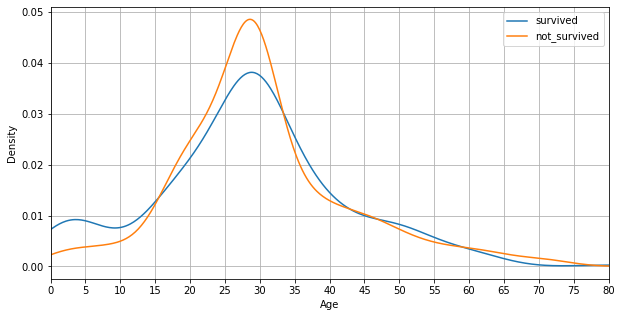

In [52]:
# Survivers by Age
survive_chance_by('Age', np.arange(0, 81, 5), (0, 80))

<p>Few Findings:</p>
<ol>
    <li>0-16 years old have the higher survivability chance</li>
    <li>16-33 years old had the lower chance of survival</li>
    <li>33-43 years old had the better chance of survival</li>
    <li>For the rest of the passengers the chances are almost equal</li>
</ol>

In [53]:
X_train['Age_group'] = pd.cut(x=X_train.Age, labels=[4, 1, 3, 2],
                         bins=[-1, 16, 33, 43, X_train.Age.max()]).astype('float')

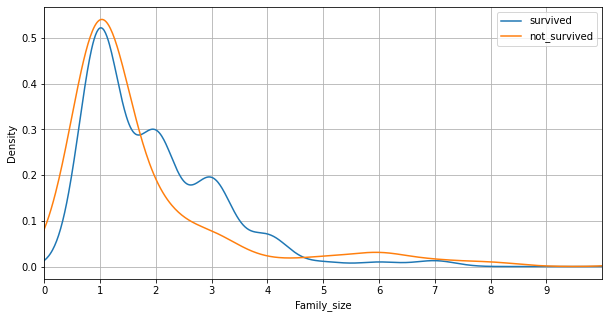

In [54]:
# Survivers by Age
survive_chance_by('Family_size', np.arange(0, 10, 1), (0, 10))

<p>Few Findings:<p>
<ol>
    <li>Single persons had lower chance to survive.</li>
    <li>2 to 4 members in families had higher chances, as they had some priority to safe-boats with 1 or 2 children with them.</li>
    <li>5 and more members families had almost equal  and lower chances of survival.</li>
</ol>

In [55]:
#Create Family_group feature
X_train['Family_group'] = pd.cut(x=X_train.Family_size, labels=[1, 3, 2], 
                            bins=[-1, 1, 4, X_train.Family_size.max()]).astype('float')

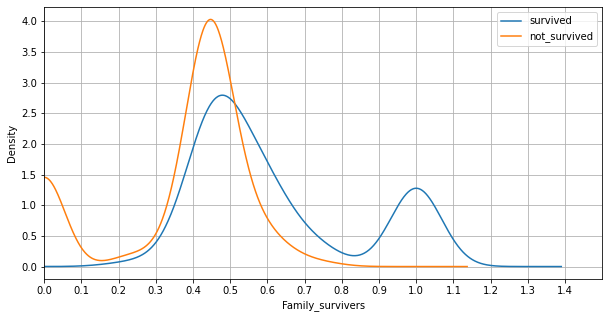

In [56]:
# Survivers by Family_survivers
survive_chance_by('Family_survivers', np.arange(0, 1.5, 0.1), (0, 1.5))

In [57]:
# Create Lucky_family feature
X_train['Lucky_family'] = pd.cut(x=X_train.Family_survivers, labels=[2, 3, 1, 4],
                            bins=[-1, 0.22, 0.35, 0.49, X_train.Family_survivers.max()]).astype('float')

Let's Standardize our value

In [58]:
# Apply np.log to normalize the skewed right Price
X_train.Price = X_train.Price.apply(np.log1p)

# Standardize 
std_scaler = StandardScaler()

df_scaled = std_scaler.fit_transform(X_train)
X_train = pd.DataFrame(df_scaled, columns=X_train.columns)

In [59]:
# Drop features not used for modeling
cols_to_drop = ['Family_survivers', 'SibSp', 'Parch', 'Family_size']
X_train = X_train.drop(cols_to_drop, axis=1)
X_train.head(3)

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,...,Title_Mrs,Title_Noble,Age,Price,Deck,Escape_density,Deck_survive_ratio,Age_group,Family_group,Lucky_family
0,-0.572351,-0.518084,0.919925,-0.743497,0.743497,-0.50977,-0.32204,0.655011,-0.21532,-0.201347,...,-0.676523,-0.15052,-0.598662,-0.751795,-1.265090,1.317009,-0.990076,-0.691263,1.365448,-0.847712
1,1.747178,-0.518084,-1.087045,1.344995,-1.344995,1.96167,-0.32204,-1.526692,-0.21532,-0.201347,...,1.478146,-0.15052,0.642372,1.744502,1.208402,-1.366309,1.280718,1.227853,1.365448,1.416890
2,-0.572351,-0.518084,0.919925,1.344995,-1.344995,-0.50977,-0.32204,0.655011,-0.21532,-0.201347,...,1.478146,-0.15052,-0.288404,-0.559809,-0.028344,0.099601,-0.418761,-0.691263,-0.785420,-0.847712


**Info of our `X_train` before splitting:**

In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass_1            1309 non-null   float64
 1   Pclass_2            1309 non-null   float64
 2   Pclass_3            1309 non-null   float64
 3   Sex_female          1309 non-null   float64
 4   Sex_male            1309 non-null   float64
 5   Embarked_C          1309 non-null   float64
 6   Embarked_Q          1309 non-null   float64
 7   Embarked_S          1309 non-null   float64
 8   Title_Master        1309 non-null   float64
 9   Title_Miss          1309 non-null   float64
 10  Title_Mr            1309 non-null   float64
 11  Title_Mrs           1309 non-null   float64
 12  Title_Noble         1309 non-null   float64
 13  Age                 1309 non-null   float64
 14  Price               1309 non-null   float64
 15  Deck                1309 non-null   float64
 16  Escape

from above we can see that it shows `1308` rows before splitting as currently the `X_train` have the concatenation data from the `X`(Training) and `Y`(Testing) dataset. Let's Split the data.

**Splitting of Testing and Training Data:**

In [61]:
X = X_train[:X_max_index]
Y = X_train[X_max_index:]

**Processed Data Correlation:**

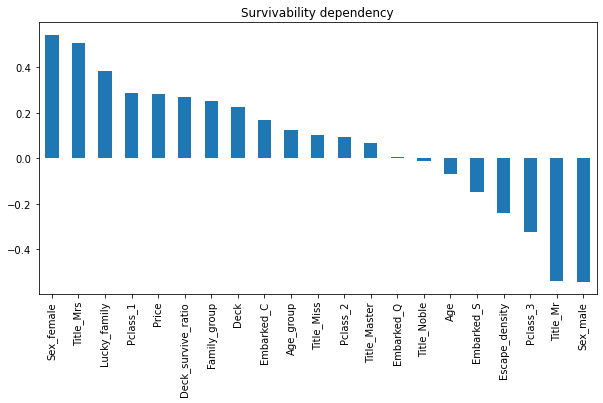

In [62]:
# Concatenate into a full dataset
X_train = pd.concat([X, y], axis=1)

corr = X_train.corr()['Survived'].sort_values(ascending=False)

# Correlation graph
corr[1:].plot(kind='bar', figsize=(10,5), title='Survivability dependency')
plt.show()

**Conclusion :**
* `Females` and `Mrs` had the more chances of survival. Women and children first !!!
* `Pclass1` and `Price` has the positive correlation. So priority was given to rich persons also.

*The ground truth is that on the Titanic it is better to not be an usual single adult male on a lower deck and embarked from Southampton with a cheap ticket price.*

In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass_1            891 non-null    float64
 1   Pclass_2            891 non-null    float64
 2   Pclass_3            891 non-null    float64
 3   Sex_female          891 non-null    float64
 4   Sex_male            891 non-null    float64
 5   Embarked_C          891 non-null    float64
 6   Embarked_Q          891 non-null    float64
 7   Embarked_S          891 non-null    float64
 8   Title_Master        891 non-null    float64
 9   Title_Miss          891 non-null    float64
 10  Title_Mr            891 non-null    float64
 11  Title_Mrs           891 non-null    float64
 12  Title_Noble         891 non-null    float64
 13  Age                 891 non-null    float64
 14  Price               891 non-null    float64
 15  Deck                891 non-null    float64
 16  Escape_d

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass_1            891 non-null    float64
 1   Pclass_2            891 non-null    float64
 2   Pclass_3            891 non-null    float64
 3   Sex_female          891 non-null    float64
 4   Sex_male            891 non-null    float64
 5   Embarked_C          891 non-null    float64
 6   Embarked_Q          891 non-null    float64
 7   Embarked_S          891 non-null    float64
 8   Title_Master        891 non-null    float64
 9   Title_Miss          891 non-null    float64
 10  Title_Mr            891 non-null    float64
 11  Title_Mrs           891 non-null    float64
 12  Title_Noble         891 non-null    float64
 13  Age                 891 non-null    float64
 14  Price               891 non-null    float64
 15  Deck                891 non-null    float64
 16  Escape_d

In [65]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass_1            418 non-null    float64
 1   Pclass_2            418 non-null    float64
 2   Pclass_3            418 non-null    float64
 3   Sex_female          418 non-null    float64
 4   Sex_male            418 non-null    float64
 5   Embarked_C          418 non-null    float64
 6   Embarked_Q          418 non-null    float64
 7   Embarked_S          418 non-null    float64
 8   Title_Master        418 non-null    float64
 9   Title_Miss          418 non-null    float64
 10  Title_Mr            418 non-null    float64
 11  Title_Mrs           418 non-null    float64
 12  Title_Noble         418 non-null    float64
 13  Age                 418 non-null    float64
 14  Price               418 non-null    float64
 15  Deck                418 non-null    float64
 16  Escap

# 5. Model Training <a class="anchor" id="model_selection"></a>
* We will be using `RandomForest` Classifier to train our model.
* First we will train the model with all the features,
* Then we will run `SequentialFeatureSelector` for feature selection and,
* Then we compare the score of the both(with and without feature selection) to train our final model with best score and parameters.

`RandomForest` Classification:

In [69]:
# Define model
cat_model = CatBoostClassifier()


# Define parameters' grid
grid = {'verbose': [False],
         'thread_count': [-1],
         'depth': [3, 4, 5, 6,7,8,9,10],
         'iterations': [500, 1000, 2000, 3000,4000, 5000],
         'learning_rate': [0.0001, 0.001, 0.01,0.1, 1]}

# Define GridSearchCV
grid_cat = GridSearchCV(estimator=cat_model, param_grid=grid, cv=3, n_jobs=-1)
grid_cat.fit(X, y)

params = grid_cat.best_params_

print('\n Best Score:\n', grid_cat.best_score_)
print('\n Best Parameters:\n', params)


 Best Score:
 0.8451178451178452

 Best Parameters:
 {'depth': 3, 'iterations': 5000, 'learning_rate': 0.01, 'thread_count': -1, 'verbose': False}


In [70]:
# Define model
rf_model = RandomForestClassifier()


# Define parameters' grid
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(20) ],
             'max_features':[2*n+1 for n in range(20)]}

#Grid Search Hyperparameter tuning
search = GridSearchCV(estimator=rf_model, param_grid=param_grid,scoring='accuracy', cv=3, n_jobs =1)
search.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                       23, 25, 27, 29, 31, 33, 35, 37, 39],
                         'max_features': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

In [71]:
#we will print the best score and parameters here for clearer view
print('\n Best Score:\n', search.best_score_)
print('\n Best Parameters:\n', search.best_params_)


 Best Score:
 0.851851851851852

 Best Parameters:
 {'max_depth': 5, 'max_features': 19, 'n_estimators': 5}


`RandomForest` Classifier with feature selection.

In [74]:
rf_model = RandomForestClassifier(n_estimators= 21, max_depth=5, max_features = 19, n_jobs=2)
# Define and fit feature selector
sfs = SequentialFeatureSelector(rf_model, 
                                scoring='accuracy', 
                                direction = 'backward')
sfs.fit(X, y)

# List of the final features to be used for submission modeling
rf_final_features = list(sfs.get_feature_names_out())
print(rf_final_features)

['Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Mr', 'Title_Mrs', 'Title_Noble', 'Age', 'Lucky_family']


In [75]:
#Loading the training & testing features
X_train_rf = X[rf_final_features]
X_test_rf = Y[rf_final_features]

In [ ]:
# Define model
rf_model = RandomForestClassifier()


# Define parameters' grid
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(20) ],
             'max_features':[2*n+1 for n in range(20)]}

#Grid Search Hyperparameter tuning
fs_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,scoring='accuracy', cv=3, n_jobs =1)
fs_search.fit(X_train_rf, y)

In [ ]:

best_score = {'Model': ['Random Forest Classifier'],
              'Score without Feautre Selection': [search.best_score_],
              'Score without Feautre Selection': [fs_search.best_score_]
             }

score_df = pd.DataFrame(best_score)
score_df